In [47]:
# custom functions
from definitions import fake_num, save_results, show_plots, sign_level, save_figs, country_col
from helper_functions_general import flatten, arco_pivot, sc_pivot, get_impl_date, transform_back, get_table_path, get_fig_path, \
    read_data, get_data_path
from plot_functions import plot_lasso_path, plot_predictions
from statistical_tests import shapiro_wilk_test

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [29]:
target_country = 'france'
timeframe = 'm'

In [30]:
table_path_res = get_table_path(timeframe=timeframe, folder='results', country=target_country)
table_path_res

'output/m/tables/results/france/'

In [31]:
act_pred = read_data(source_path=table_path_res, file_name='arco_france_m_act_pred_log')
act_pred

,date,act,pred,error
0,2002-01-01,24.598456,24.598456,0.000000
1,2002-02-01,24.474343,24.474343,0.000000
2,2002-03-01,24.476245,24.476245,0.000000
3,2002-04-01,24.378945,24.378945,0.000000
4,2002-05-01,24.242201,24.242201,0.000000
...,...,...,...,...
209,2019-06-01,24.028838,23.971828,-0.057010
210,2019-07-01,24.027877,23.964162,-0.063715
211,2019-08-01,23.990536,23.936218,-0.054318
212,2019-09-01,24.041071,23.963054,-0.078017


In [32]:
act_check = np.exp(act_pred['act'])
act_check

0      4.819184e+10
1      4.256690e+10
2      4.264793e+10
3      3.869378e+10
4      3.374849e+10
           ...     
209    2.726414e+10
210    2.723795e+10
211    2.623962e+10
212    2.759971e+10
213    3.137777e+10
Name: act, Length: 214, dtype: float64

In [35]:
act = read_data(source_path=get_data_path(timeframe='m'), file_name='co2_m')
act[act[country_col]==target_country][24:]

,country,date,year,month,co2
1224,france,2002-01-01,2002,1,4.819184e+10
1225,france,2002-02-01,2002,2,4.256690e+10
1226,france,2002-03-01,2002,3,4.264793e+10
1227,france,2002-04-01,2002,4,3.869378e+10
1228,france,2002-05-01,2002,5,3.374849e+10
...,...,...,...,...,...
1435,france,2019-08-01,2019,8,2.623962e+10
1436,france,2019-09-01,2019,9,2.759971e+10
1437,france,2019-10-01,2019,10,3.137777e+10
1438,france,2019-11-01,2019,11,3.960725e+10


In [54]:
gdp = read_data(source_path=get_data_path(timeframe='m'), file_name='gdp_m')
gdp = gdp[gdp[country_col]==target_country].reset_index(drop=True)

gdp['gdp_check'] = np.log(gdp['gdp']).diff(12)[12:-2]
gdp['ind_prod_check'] = ind_prod['ind_prod'][12:-4]
gdp

,country,date,year,month,gdp,gdp_check,ind_prod_check
0,france,2000-01-01,2000,1,1.545194e+12,NaN,NaN
1,france,2000-02-01,2000,2,1.556457e+12,NaN,NaN
2,france,2000-03-01,2000,3,1.567721e+12,NaN,NaN
3,france,2000-04-01,2000,4,1.578985e+12,NaN,NaN
4,france,2000-05-01,2000,5,1.589227e+12,NaN,NaN
...,...,...,...,...,...,...,...
233,france,2019-06-01,2019,6,3.430882e+12,0.091627,-0.004
234,france,2019-07-01,2019,7,3.451706e+12,0.092660,0.001
235,france,2019-08-01,2019,8,3.464187e+12,0.089035,-0.012
236,france,2019-09-01,2019,9,3.476668e+12,NaN,NaN


In [55]:
gdp.corr()

,year,month,gdp,gdp_check,ind_prod_check
year,1.000000,-0.020468,0.986744,0.096015,0.077700
month,-0.020468,1.000000,0.029681,-0.036325,-0.036594
gdp,0.986744,0.029681,1.000000,0.192514,0.097558
gdp_check,0.096015,-0.036325,0.192514,1.000000,0.526222
ind_prod_check,0.077700,-0.036594,0.097558,0.526222,1.000000


In [49]:
ind_prod = read_data(source_path=get_data_path(timeframe='m'), file_name='ind_prod_m')
ind_prod = ind_prod[ind_prod[country_col]==target_country].reset_index(drop=True)
ind_prod

ind_prod_check = ind_prod['ind_prod'][12:-4]
ind_prod_check

12     0.030
13     0.038
14     0.037
15     0.015
16     0.010
       ...  
231    0.012
232    0.037
233   -0.004
234    0.001
235   -0.012
Name: ind_prod, Length: 224, dtype: float64

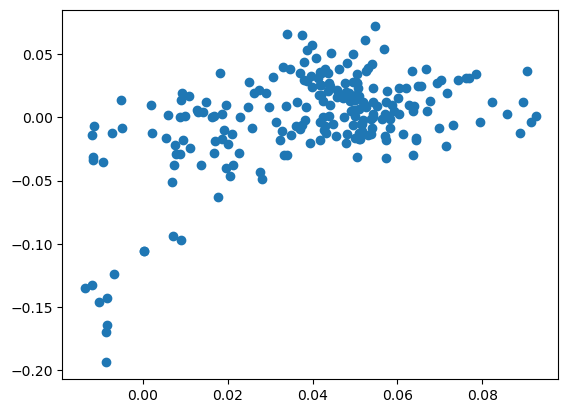

In [50]:
plt.scatter(gdp_check, ind_prod_check)